In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df = pd.read_csv('Well_58-32_raw_pason_log.csv',dtype = float ,low_memory=False,infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [90]:
df.head()

,Depth (m),ROP(1 m),Bit Depth (m),Temp Out (C),Temp In (C),Pump Press (KPa),Hookload (kg),Surface Torque (KPa),Rotary Speed (rpm)
datetime,,,,,,,,,
2017-07-31 10:07:57,24.69,0.0,0.0,29.5,32.86,84.26,7619.05,1307.84,0.00
2017-07-31 10:07:58,24.69,0.0,0.0,29.5,32.86,81.64,7619.05,1307.84,0.04
2017-07-31 10:07:59,24.69,0.0,0.0,29.5,32.86,79.02,7650.79,1315.43,0.00
2017-07-31 10:08:00,24.69,0.0,0.0,29.5,32.83,81.64,7619.05,1307.84,0.04
2017-07-31 10:08:01,24.69,0.0,0.0,29.5,32.83,81.64,7582.77,1315.43,0.00


In [91]:
df.columns

Index(['Depth (m)', 'ROP(1 m)', 'Bit Depth (m)', 'Temp Out (C)', 'Temp In (C)',
       'Pump Press (KPa)', 'Hookload (kg)', 'Surface Torque (KPa)',
       'Rotary Speed (rpm)'],
      dtype='object')

In [92]:
selected_cols =['Depth (m)', 'ROP(1 m)','Bit Depth (m)','Temp Out (C)','Temp In (C)', \
                'Pump Press (KPa)','Hookload (kg)','Surface Torque (KPa)', 'Rotary Speed (rpm)']
df = df[selected_cols]

In [93]:
#check for missing values
df.isnull().sum()

Depth (m)               0
ROP(1 m)                0
Bit Depth (m)           0
Temp Out (C)            0
Temp In (C)             0
Pump Press (KPa)        0
Hookload (kg)           0
Surface Torque (KPa)    0
Rotary Speed (rpm)      0
dtype: int64

In [94]:
#daily resampling
daily_df = df.resample('1Min').sum()

In [95]:
daily_df.head()

,Depth (m),ROP(1 m),Bit Depth (m),Temp Out (C),Temp In (C),Pump Press (KPa),Hookload (kg),Surface Torque (KPa),Rotary Speed (rpm)
datetime,,,,,,,,,
2017-07-31 10:07:00,74.07,0.0,0.0,88.50,98.58,244.92,22888.89,3931.11,0.04
2017-07-31 10:08:00,1407.33,0.0,0.0,1682.32,1872.90,4645.62,435687.02,75146.26,0.72
2017-07-31 10:09:00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2017-07-31 10:10:00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2017-07-31 10:11:00,395.04,0.0,0.0,475.22,527.28,1280.04,122662.08,22129.29,0.52


In [96]:
daily_df.columns

Index(['Depth (m)', 'ROP(1 m)', 'Bit Depth (m)', 'Temp Out (C)', 'Temp In (C)',
       'Pump Press (KPa)', 'Hookload (kg)', 'Surface Torque (KPa)',
       'Rotary Speed (rpm)'],
      dtype='object')

In [97]:
cols = daily_df.columns.tolist()
rep = ["depth", "rop", "bit_depth","temp_out","temp_in", "pump_press","hookload","torque","speed"]
rep_cols = dict(zip(cols,rep))
rep_cols

{'Depth (m)': 'depth',
 'ROP(1 m)': 'rop',
 'Bit Depth (m)': 'bit_depth',
 'Temp Out (C)': 'temp_out',
 'Temp In (C)': 'temp_in',
 'Pump Press (KPa)': 'pump_press',
 'Hookload (kg)': 'hookload',
 'Surface Torque (KPa)': 'torque',
 'Rotary Speed (rpm)': 'speed'}

In [98]:
new_daily_df = daily_df.rename(columns= rep_cols)

In [99]:
new_daily_df.head()

,depth,rop,bit_depth,temp_out,temp_in,pump_press,hookload,torque,speed
datetime,,,,,,,,,
2017-07-31 10:07:00,74.07,0.0,0.0,88.50,98.58,244.92,22888.89,3931.11,0.04
2017-07-31 10:08:00,1407.33,0.0,0.0,1682.32,1872.90,4645.62,435687.02,75146.26,0.72
2017-07-31 10:09:00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2017-07-31 10:10:00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2017-07-31 10:11:00,395.04,0.0,0.0,475.22,527.28,1280.04,122662.08,22129.29,0.52


In [100]:
def plot_state(col_name):
    plt.figure(figsize=(10,6))
    plt.plot(new_daily_df.index, new_daily_df[col_name],'--', marker='*')
#     plt.scatter(new_daily_df.index, new_daily_df[col_name])
    plt.grid()
    plt.xlabel('DateTime')
    plt.ylabel(col_name)

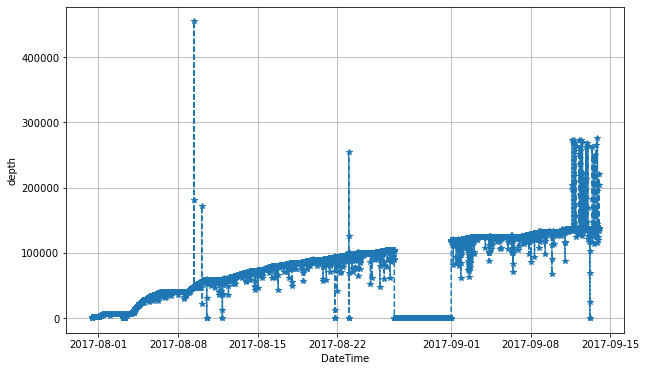

In [101]:
plot_state("depth")

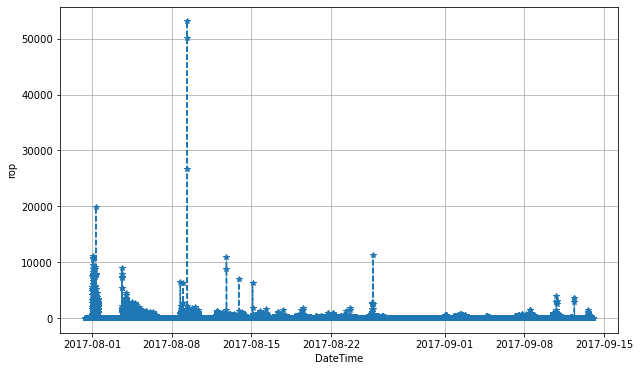

In [102]:
plot_state("rop")

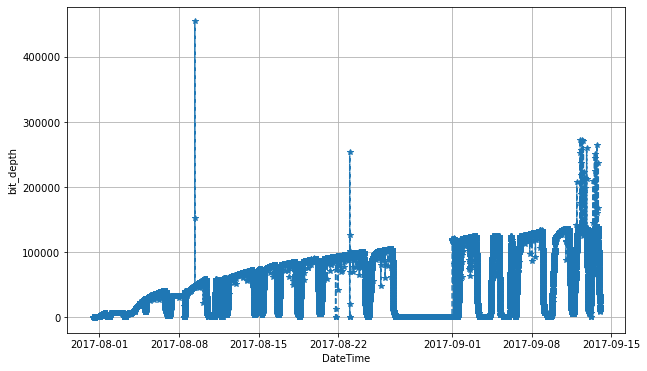

In [103]:
plot_state("bit_depth")

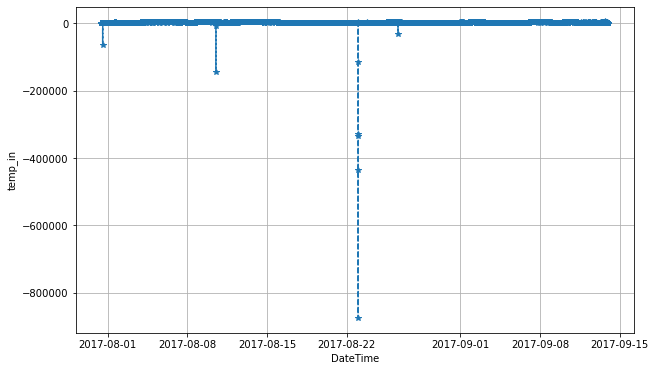

In [104]:
plot_state("temp_in")

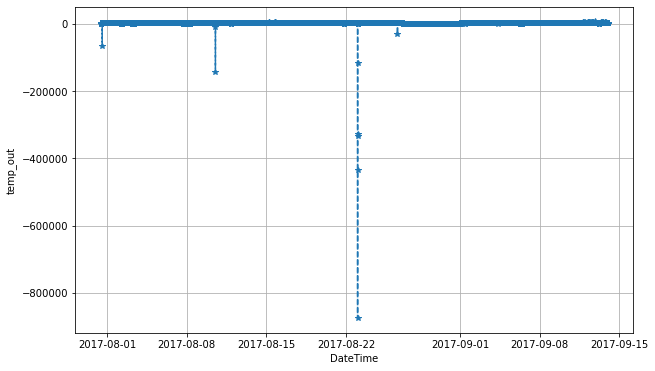

In [105]:
plot_state("temp_out")

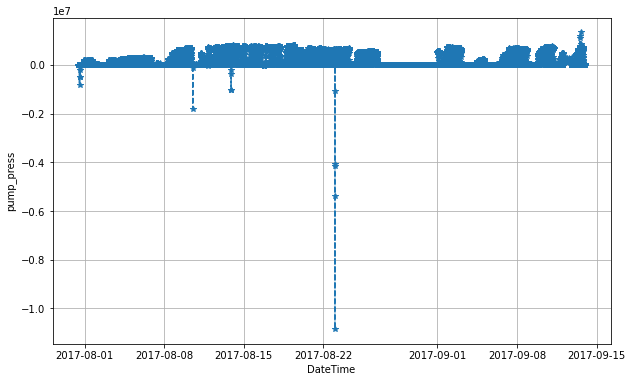

In [106]:
plot_state("pump_press")

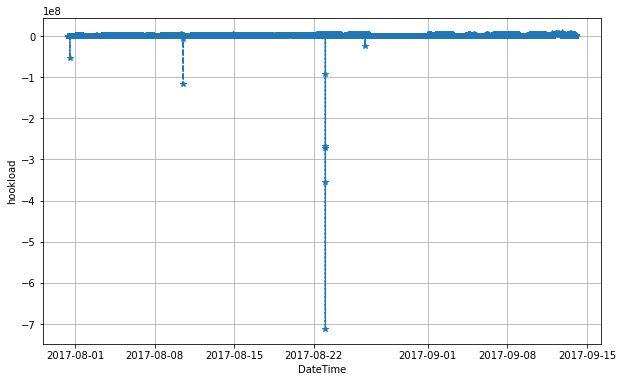

In [107]:
plot_state("hookload")

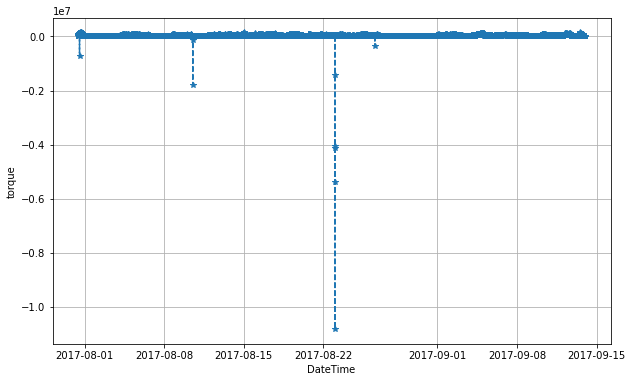

In [108]:
plot_state("torque")

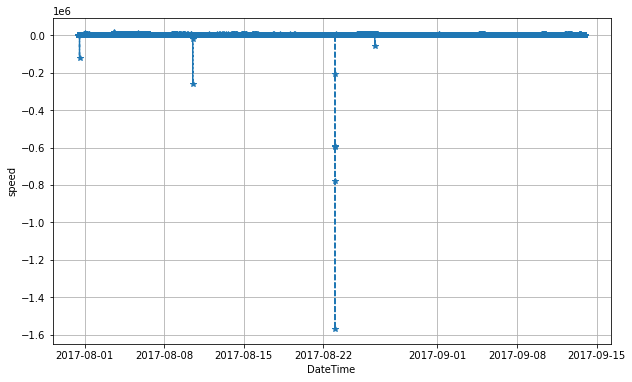

In [109]:
plot_state("speed")

In [110]:
from scipy.stats.stats import pearsonr
import itertools
correlations = {}
columns = df.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(df.loc[:, col_a], df.loc[:, col_b])

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())

                                               PCC       p-value
Bit Depth (m)__Hookload (kg)              0.304583  0.000000e+00
Bit Depth (m)__Pump Press (KPa)           0.630894  0.000000e+00
Bit Depth (m)__Rotary Speed (rpm)         0.094985  0.000000e+00
Bit Depth (m)__Surface Torque (KPa)       0.249044  0.000000e+00
Bit Depth (m)__Temp In (C)                0.067844  0.000000e+00
Bit Depth (m)__Temp Out (C)               0.120005  0.000000e+00
Depth (m)__Bit Depth (m)                  0.549517  0.000000e+00
Depth (m)__Hookload (kg)                  0.143696  0.000000e+00
Depth (m)__Pump Press (KPa)               0.169944  0.000000e+00
Depth (m)__ROP(1 m)                      -0.154153  0.000000e+00
Depth (m)__Rotary Speed (rpm)            -0.007870  1.109916e-47
Depth (m)__Surface Torque (KPa)           0.130471  0.000000e+00
Depth (m)__Temp In (C)                   -0.061355  0.000000e+00
Depth (m)__Temp Out (C)                   0.007416  1.560843e-42
Hookload (kg)__Rotary Spe

In [111]:
import statsmodels.api as sm
from pylab import rcParams

### testing for daily time series
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(new_daily_df['rop'], model='additive')
decompose_series.plot()
plt.show()

ValueError: freq T not understood. Please report if you think this is in error.

In [ ]:
# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity
from statsmodels.tsa.stattools import adfuller

#since we have several samples of time series lets define a function that could check for
#stationarity and output the various columns that are stationary in the series.

def adf_test(d_set):
    adf_result = adfuller(d_set, autolag='AIC')
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print(f'No. of lags used: {adf_result[2]}')
    print(f'No. of observations used : {adf_result[3]}')
    print('Critical Values:')
    for k, v in adf_result[4].items():
        print(f'   {k}: {v}') 

    p = adf_result[1]
    if p <= 0.05:
        print("Stationarity: True")
        print('======================================\n')
    else:
        print("Stationarity: False")
        print('======================================\n\n')

# this function takes a time series datframe and checks the columns that are stationary.
def get_stationarity(data):
    for i in data.columns:
        print("Column: ",i)
        print('======================================')
        adf_test(data[i])

In [ ]:
#test for stationarity for daily time series
get_stationarity(new_daily_df)

In [ ]:
rolling_mean = new_daily_df.rolling(12).mean()

In [ ]:
def visualise_state(col_name):
    plt.figure(figsize=(10,6))
    original = plt.plot(new_daily_df.index, new_daily_df[col_name],'--', marker='*', color = 'blue',label = 'original')
    mean = plt.plot(rolling_mean.index, rolling_mean[col_name], color = 'red',label = 'rolling mean')
    plt.grid()
    plt.legend(loc = 'best')
    plt.xlabel('Datetime')
    plt.ylabel(col_name)

In [ ]:
# plotting for rop
visualise_state("rop")

In [ ]:
from fbprophet import Prophet

In [ ]:
#we have to reset the datetime index and assign it as a column in the new dataframe
new_daily_df.reset_index(inplace=True)
prophet_daily = new_daily_df[['datetime','rop']]

In [ ]:
#renaming the columns 
prophet_daily = prophet_daily.rename(columns = {'datetime': 'ds','rop': 'y'})
print(prophet_daily.shape)
prophet_daily.head()

In [ ]:
prophet_daily.tail()

In [66]:
prophet_daily.shape

(45, 2)

In [34]:
train_set, test_set  = prophet_daily.iloc[:30,:], prophet_daily.iloc[30:,:]

In [35]:
#fitting the model to the dataset
model = Prophet(daily_seasonality=True)
model.fit(train_set)
pred = model.predict(test_set)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


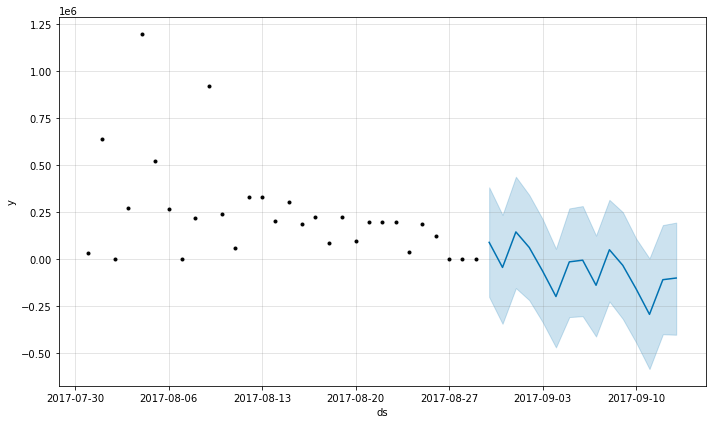

In [36]:
model.plot(pred)
plt.show()

## Multivariate

In [ ]:
# Renaming the columns
daily_df2 = daily_df2.rename(columns = {'datetime':'ds','Global_active_power':'y','Global_reactive_power':'add1',
                                                'Voltage':'add2','Global_intensity':'add3','Sub_metering_1':'add4',
                                                'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [41]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set['y']),np.array(pred['yhat'])))
print(f'RMSE: {round(rmse,2)}')

RMSE: 200702.09


In [43]:
# Define a model for the calculation of MAPE
def Metric(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) *100
mape = Metric(test_set['y'],pred['yhat'])
print(f'MAPE: {round(mape,2)}')

MAPE: inf


<ipython-input-43-bb01b762df7d>:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100


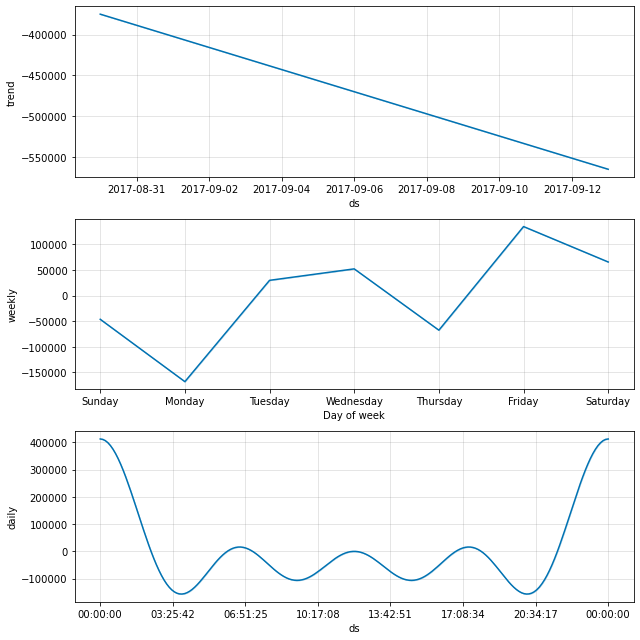

In [44]:
model.plot_components(pred)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(,y, random_state = 1, test_size=0.2 )

SyntaxError: invalid syntax (<ipython-input-39-92696e0b2079>, line 2)